Submitters:

Amit Amos https://github.com/AmitAmos1

Rafael Olaru https://github.com/rafaolaru

Ofek Ram Nissim https://github.com/ofeknissim

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

In [2]:
# n1 = 512
# n2 = 400
# n3 = 791

# X = create_data(1.2, n1, n2, n3, 0)
# plt.figure(figsize=(7,6))
# plt.scatter(X[:n1,0], X[:n1,1], label="Blob")
# plt.scatter(X[n1:n1+n2,0], X[n1:n1+n2,1], label="Moons")
# plt.scatter(X[n1+n2:,0], X[n1+n2:,1], label="Circle")

# plt.legend()
# plt.show()
# print(X)
!pip install mlflow
datasets = []
for i in range(10):
    noise = np.random.uniform(0.2, 3.0)
    n1 = np.random.randint(600, 5000)
    n2 = np.random.randint(600, 4000)
    n3 = np.random.randint(600, 8000)

    X = create_data(noise, n1, n2, n3, 0)

    datasets.append({
        "name": f"DataSet{i+1}",
        "noise": noise,
        "make_blobs": n1,
        "make_moons": n2,
        "make_circles": n3,
        "X": X
    })

    print(datasets[-1]["name"], datasets[-1]["X"].shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.6/810.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.0 MB/s eta 0:00:00
DataSet1 (9931, 2)
DataSet2 (9507, 2)
DataSet3 (8543, 2)
DataSet4 (8918, 2)
DataSet5 (11443, 2)
DataSet6 (9094, 2)
DataSet7 (94

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

2026/02/24 18:10:07 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/24 18:10:07 INFO mlflow.store.db.utils: Updating database tables
2026/02/24 18:10:12 INFO mlflow.tracking.fluent: Experiment with name 'Clustering_Comparison' does not exist. Creating a new experiment.


DataSet1: Best K :9, silhouette best score : 0.6422
DataSet2: Best K :4, silhouette best score : 0.5566
DataSet3: Best K :4, silhouette best score : 0.5678
DataSet4: Best K :5, silhouette best score : 0.6281
DataSet5: Best K :2, silhouette best score : 0.6319
DataSet6: Best K :5, silhouette best score : 0.6016
DataSet7: Best K :5, silhouette best score : 0.6999
DataSet8: Best K :2, silhouette best score : 0.5429
DataSet9: Best K :2, silhouette best score : 0.5597
DataSet10: Best K :4, silhouette best score : 0.5676


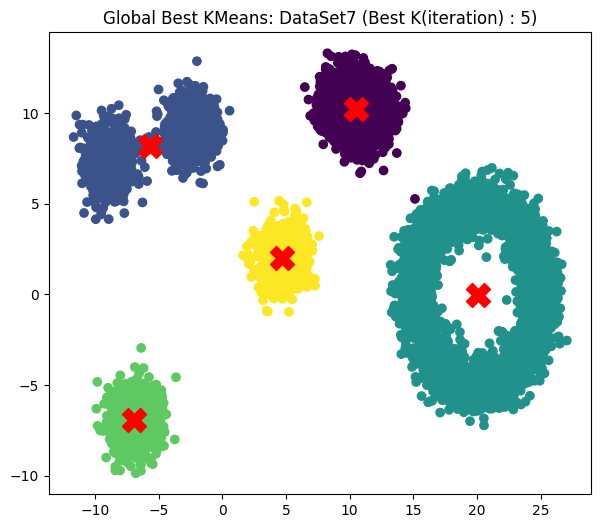

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from math import inf
import mlflow

mlflow.set_experiment("Clustering_Comparison")
kmeans_results = []
kmeans_all_runs = []
global_best_score = -inf
global_best_model = None
global_best_labels = None
global_best_k = None
global_best_dataset = None
global_best_X = None

for data in datasets:
    X = data["X"]

    max_score_km = -inf
    K_iter_best_score_km = 0

    for k in range(2, 12):

        with mlflow.start_run():
            model = KMeans(n_clusters=k, init='k-means++', n_init=20,  max_iter=300, tol=0.0001, verbose=0, random_state=42, copy_x=True, algorithm='elkan' )
            label_km = model.fit_predict(X)
            score_km = silhouette_score(X, label_km)
            kmeans_all_runs.append({"Dataset": data["name"], "Noise": data["noise"], "n1": data["make_blobs"], "n2": data["make_moons"], "n3": data["make_circles"], "Algorithm": "KMeans", "k": k, "Silhouette": score_km})
            if score_km > global_best_score:
                global_best_score = score_km
                global_best_model = model
                global_best_labels = label_km.copy()
                global_best_k = k
                global_best_dataset = data["name"]
                global_best_X = X

            if score_km > max_score_km:
                max_score_km = score_km
                K_iter_best_score_km = k

            mlflow.log_param("dataset", data["name"])
            mlflow.log_param("noise", data["noise"])
            mlflow.log_param("n1", data["make_blobs"])
            mlflow.log_param("n2", data["make_moons"])
            mlflow.log_param("n3", data["make_circles"])
            mlflow.log_param("algorithm", "KMeans")
            mlflow.log_param("k", k)
            mlflow.log_metric("silhouette", score_km)

    print(f"{data['name']}: Best K :{K_iter_best_score_km}, silhouette best score : {max_score_km:.4f}")

    kmeans_results.append({"dataset": data["name"], "noise": data["noise"], "K Best Score": K_iter_best_score_km, "silhouette Best Score": max_score_km})

plt.figure(figsize=(7,6))
plt.scatter(global_best_X[:,0], global_best_X[:,1], c=global_best_labels)

centroids = global_best_model.cluster_centers_

plt.scatter(
    centroids[:,0],
    centroids[:,1],
    c='red',
    s=300,
    marker='X'
)

plt.title(f"Global Best KMeans: {global_best_dataset} (Best K(iteration) : {global_best_k})")
plt.show()

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

2026/02/24 18:13:08 INFO mlflow.tracking.fluent: Experiment with name 'AgglomerativeClustering_Comparison' does not exist. Creating a new experiment.


DataSet1: Best K :5, Best metric : euclidean, Best linkage : average , silhouette best score : 0.6527
DataSet2: Best K :2, Best metric : euclidean, Best linkage : average , silhouette best score : 0.5700
DataSet3: Best K :4, Best metric : euclidean, Best linkage : ward , silhouette best score : 0.5645
DataSet4: Best K :5, Best metric : euclidean, Best linkage : average , silhouette best score : 0.6348
DataSet5: Best K :2, Best metric : euclidean, Best linkage : complete , silhouette best score : 0.6179
DataSet6: Best K :5, Best metric : euclidean, Best linkage : ward , silhouette best score : 0.5986
DataSet7: Best K :5, Best metric : euclidean, Best linkage : ward , silhouette best score : 0.7000
DataSet8: Best K :2, Best metric : euclidean, Best linkage : average , silhouette best score : 0.5760
DataSet9: Best K :2, Best metric : euclidean, Best linkage : average , silhouette best score : 0.5983
DataSet10: Best K :5, Best metric : euclidean, Best linkage : average , silhouette best sc

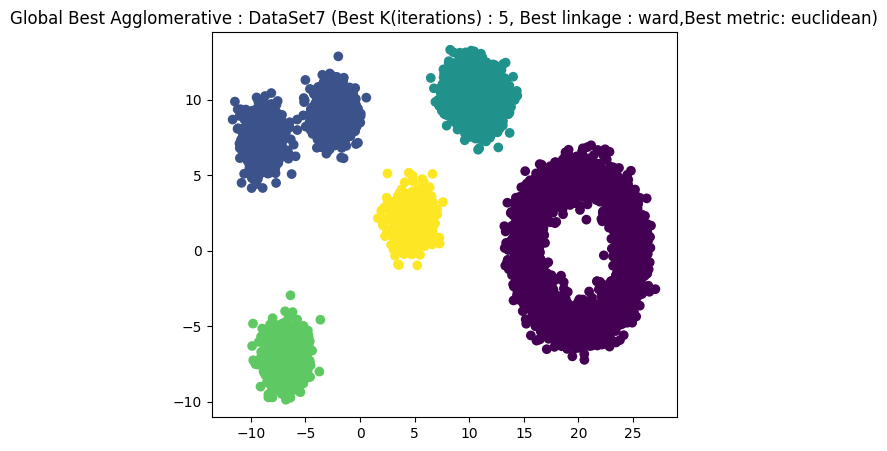

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from math import inf
import matplotlib.pyplot as plt
import mlflow

mlflow.set_experiment("AgglomerativeClustering_Comparison")
hier_results  = []
hier_all_runs = []
global_best_score = -inf
global_best_model = None
global_best_labels = None
global_best_k = None
global_best_dataset = None
global_best_X = None
global_best_linkage = None
global_best_metric = None
metrics = ["euclidean", "manhattan"]
linkages = ["ward", "average", "complete"]
for data in datasets:
    X = data["X"]
    max_score_heir = -inf
    K_iter_best_score_heir = 0
    best_linkage_dataset = None
    best_metric_dataset = None
    for k in range(2, 12):
        for linkage in linkages:
          for metric in metrics:
            if linkage == "ward" and metric != "euclidean":
                continue
            with mlflow.start_run():
                model = AgglomerativeClustering(n_clusters=k, metric=metric, linkage=linkage, connectivity=None, compute_full_tree="auto", compute_distances=True)
                label_heir = model.fit_predict(X)
                score_hier = silhouette_score(X, label_heir, sample_size=2000, random_state=42)
                hier_all_runs.append({
                "Dataset": data["name"],
                "Noise": data["noise"],
                "n1": data["make_blobs"],
                "n2": data["make_moons"],
                "n3": data["make_circles"],
                "Algorithm": "Agglomerative",
                "k": k,
                "linkage": linkage,
                "metric": metric,
                "Silhouette": score_hier
                })
                if score_hier > global_best_score:
                    global_best_score = score_hier
                    global_best_model = model
                    global_best_labels = label_heir.copy()
                    global_best_k = k
                    global_best_dataset = data["name"]
                    global_best_X = X
                    global_best_linkage = linkage
                    global_best_metric = metric
                if score_hier > max_score_heir:
                    max_score_heir = score_hier
                    K_iter_best_score_heir = k
                    best_linkage_dataset = linkage
                    best_metric_dataset = metric

                mlflow.log_param("dataset", data["name"])
                mlflow.log_param("noise", data["noise"])
                mlflow.log_param("n1", data["make_blobs"])
                mlflow.log_param("n2", data["make_moons"])
                mlflow.log_param("n3", data["make_circles"])
                mlflow.log_param("algorithm", "Agglomerative")
                mlflow.log_param("k", k)
                mlflow.log_param("linkage", linkage)
                mlflow.log_param("metric", metric)
                mlflow.log_metric("silhouette", score_hier)

    print(f"{data['name']}: Best K :{K_iter_best_score_heir}, Best metric : {best_metric_dataset}, Best linkage : {best_linkage_dataset} , silhouette best score : {max_score_heir:.4f}")

    hier_results.append({
        "dataset": data["name"],
        "noise": data["noise"],
        "best_k": K_iter_best_score_heir,
        "best_silhouette": max_score_heir
    })

plt.figure(figsize=(6,5))
plt.scatter(global_best_X[:,0], global_best_X[:,1], c=global_best_labels)
plt.title(f"Global Best Agglomerative : {global_best_dataset} (Best K(iterations) : {global_best_k}, Best linkage : {global_best_linkage},Best metric: {global_best_metric})")
plt.show()

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


2026/02/24 18:41:25 INFO mlflow.tracking.fluent: Experiment with name 'DBSCAN_Comparison' does not exist. Creating a new experiment.


DataSet1: eps Best Score : 0.6000000000000001, min_pts Best Score : 4, Silhouette Best Score: 0.6288
DataSet2: eps Best Score : 0.4, min_pts Best Score : 4, Silhouette Best Score: 0.4839
DataSet3: eps Best Score : 0.2, min_pts Best Score : 8, Silhouette Best Score: 0.4586
DataSet4: eps Best Score : 0.2, min_pts Best Score : 12, Silhouette Best Score: 0.5212
DataSet5: eps Best Score : 0.2, min_pts Best Score : 4, Silhouette Best Score: 0.4892
DataSet6: eps Best Score : 0.2, min_pts Best Score : 6, Silhouette Best Score: 0.4506
DataSet7: eps Best Score : 0.2, min_pts Best Score : 4, Silhouette Best Score: 0.6897
DataSet8: eps Best Score : 0.2, min_pts Best Score : 8, Silhouette Best Score: 0.4757
DataSet9: eps Best Score : 0.2, min_pts Best Score : 12, Silhouette Best Score: 0.4827
DataSet10: eps Best Score : 0.4, min_pts Best Score : 4, Silhouette Best Score: 0.4736


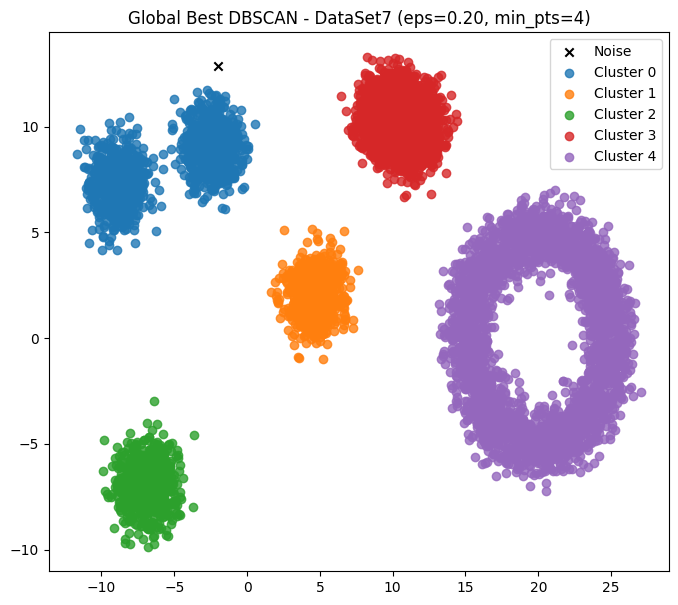

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import mlflow

mlflow.set_experiment("DBSCAN_Comparison")
dbscan_results = []
dbscan_all_runs = []
global_best_score = -inf
global_best_labels = None
global_best_eps = None
global_best_min_pts = None
global_best_dataset = None
global_best_X = None

eps_values = np.linspace(0.2, 1.2, 6)
min_samples_values = [4, 6, 8, 10, 12]

for data in datasets:
    X = data["X"]
    X_scaled = StandardScaler().fit_transform(X)
    max_score_db = -inf
    best_eps_dataset = None
    best_min_pts_dataset = None

    for eps in eps_values:
        for min_pts in min_samples_values:
            with mlflow.start_run():
                model = DBSCAN(eps=eps, min_samples=min_pts)
                labels = model.fit_predict(X_scaled)
                unique_labels = set(labels)
                clusters = unique_labels - {-1}

                if len(clusters) >= 2:
                    score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
                else:
                    score = -1
                dbscan_all_runs.append({
                "Dataset": data["name"],
                "Noise": data["noise"],
                "n1": data["make_blobs"],
                "n2": data["make_moons"],
                "n3": data["make_circles"],
                "Algorithm": "DBSCAN",
                "eps": eps,
                "min_samples": min_pts,
                "Silhouette": score
                })
                if score > global_best_score:
                    global_best_score = score
                    global_best_labels = labels.copy()
                    global_best_eps = eps
                    global_best_min_pts = min_pts
                    global_best_dataset = data["name"]
                    global_best_X = X

                if score > max_score_db:
                    max_score_db = score
                    best_eps_dataset = eps
                    best_min_pts_dataset = min_pts

                mlflow.log_param("dataset", data["name"])
                mlflow.log_param("noise", data["noise"])
                mlflow.log_param("n1", data["make_blobs"])
                mlflow.log_param("n2", data["make_moons"])
                mlflow.log_param("n3", data["make_circles"])
                mlflow.log_param("algorithm", "DBSCAN")
                mlflow.log_param("eps", eps)
                mlflow.log_param("min_samples", min_pts)
                mlflow.log_metric("silhouette", score)

    print(f"{data['name']}: eps Best Score : {best_eps_dataset}, min_pts Best Score : {best_min_pts_dataset}, Silhouette Best Score: {max_score_db:.4f}")
    dbscan_results.append({
        "dataset": data["name"],
        "noise": data["noise"],
        "best_eps": best_eps_dataset,
        "best_min_pts": best_min_pts_dataset,
        "best_silhouette": max_score_db
    })

plt.figure(figsize=(8,7))

unique_labels = np.unique(global_best_labels)
for lab in unique_labels:
    if lab == -1:
        plt.scatter( global_best_X[global_best_labels == lab, 0], global_best_X[global_best_labels == lab, 1], c='black', marker='x', label='Noise')
    else:
        plt.scatter( global_best_X[global_best_labels == lab, 0], global_best_X[global_best_labels == lab, 1], alpha=0.8, label=f'Cluster {lab}')
plt.title(f"Global Best DBSCAN - {global_best_dataset} (eps={global_best_eps:.2f}, min_pts={global_best_min_pts})")
plt.legend()
plt.show()

6. Compare the results and choose the best method for the data


In [6]:
import pandas as pd
from google.colab import files

def get_dataset_info(dataset_name):
    for d in datasets:
        if d["name"] == dataset_name:
            return d
    return None

best_results = []

for res in kmeans_results:
    d = get_dataset_info(res["dataset"])
    best_results.append({
        "Dataset": res["dataset"],
        "Noise": d["noise"],
        "Blobs (n1)": d["make_blobs"],
        "Moons (n2)": d["make_moons"],
        "Circle (n3)": d["make_circles"],
        "Total Samples": d["make_blobs"] + d["make_moons"] + d["make_circles"],
        "Algorithm": "KMeans",
        "Param1": f"K={res['K Best Score']}",
        "Param2": "-",
        "Silhouette": res["silhouette Best Score"]
    })

for res in hier_results:
    d = get_dataset_info(res["dataset"])
    best_results.append({
        "Dataset": res["dataset"],
        "Noise": d["noise"],
        "Blobs (n1)": d["make_blobs"],
        "Moons (n2)": d["make_moons"],
        "Circle (n3)": d["make_circles"],
        "Total Samples": d["make_blobs"] + d["make_moons"] + d["make_circles"],
        "Algorithm": "Agglomerative",
        "Param1": f"K={res['best_k']}",
        "Param2": "-",
        "Silhouette": res["best_silhouette"]
    })

for res in dbscan_results:
    d = get_dataset_info(res["dataset"])
    best_results.append({
        "Dataset": res["dataset"],
        "Noise": d["noise"],
        "Blobs (n1)": d["make_blobs"],
        "Moons (n2)": d["make_moons"],
        "Circle (n3)": d["make_circles"],
        "Total Samples": d["make_blobs"] + d["make_moons"] + d["make_circles"],
        "Algorithm": "DBSCAN",
        "Param1": f"eps={res['best_eps']}",
        "Param2": f"min_samples={res['best_min_pts']}",
        "Silhouette": res["best_silhouette"]
    })

df_best = pd.DataFrame(best_results)
df_sorted = df_best.sort_values(by="Silhouette", ascending=False)

df_km_all = pd.DataFrame(kmeans_all_runs)
df_hier_all = pd.DataFrame(hier_all_runs)
df_db_all = pd.DataFrame(dbscan_all_runs)

df_all_experiments = pd.concat([df_km_all, df_hier_all, df_db_all],ignore_index=True)

df_avg = df_all_experiments.groupby("Algorithm")["Silhouette"].mean().reset_index()
df_avg = df_avg.sort_values(by="Silhouette", ascending=False)

print("Average Silhouette per Algorithm")
print(df_avg)

print("Best Overall Model")
print(df_sorted.iloc[0])

file_name = "Rafael_Olaru.xlsx"

with pd.ExcelWriter(file_name) as writer:
    df_best.to_excel(writer, sheet_name="Best Per Dataset", index=False)
    df_sorted.to_excel(writer, sheet_name="Sorted by Silhouette", index=False)
    df_all_experiments.to_excel(writer, sheet_name="All Experiments", index=False)
    df_avg.to_excel(writer, sheet_name="Average by Algorithm", index=False)

print(f"Excel file '{file_name}' created successfully.")
files.download(file_name)

Average Silhouette per Algorithm
       Algorithm  Silhouette
2         KMeans    0.528931
0  Agglomerative    0.495656
1         DBSCAN    0.059771
Best Overall Model
Dataset               DataSet7
Noise                 0.812192
Blobs (n1)                2861
Moons (n2)                3779
Circle (n3)               2801
Total Samples             9441
Algorithm        Agglomerative
Param1                     K=5
Param2                       -
Silhouette            0.700007
Name: 16, dtype: object
Excel file 'Rafael_Olaru.xlsx' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>